<a href="https://colab.research.google.com/github/ajuhz/Artificial-Intelligence/blob/master/CNN_Visualizaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all required libraries
import torch
import torch.nn as nn
from torch.autograd import variable
from torchvision import models,transforms,utils
import matplotlib.pyplot as plt
from PIL import Image
from scipy import misc
%matplotlib inline


In [2]:
#create the transform mechinism
transforms = transforms.Compose([transforms.Resize([224,224]),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

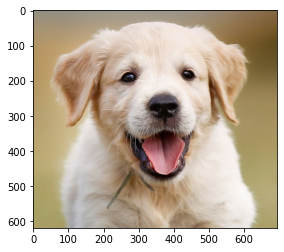

In [11]:
image=Image.open('/content/drive/My Drive/Python/dog.jpg')
plt.imshow(image)

In [4]:
#downloading VGG pretrained model 
vgg = models.vgg16(pretrained=True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [7]:
#accessin the last layer in the classifier
print(vgg.classifier[6])
#OR
print(vgg.classifier[-1])

Linear(in_features=4096, out_features=1000, bias=True)
Linear(in_features=4096, out_features=1000, bias=True)


In [12]:
# transform the input image into tensor and normalize it
image = transforms(image)
print(image)

tensor([[[ 0.3994,  0.3994,  0.3994,  ...,  0.1426,  0.1426,  0.1254],
         [ 0.3823,  0.3994,  0.3994,  ...,  0.1254,  0.1426,  0.1426],
         [ 0.4166,  0.4166,  0.4166,  ...,  0.0912,  0.1083,  0.1083],
         ...,
         [ 0.8789,  0.8789,  0.8789,  ...,  0.8447,  0.8276,  0.8276],
         [ 0.8789,  0.8789,  0.8961,  ...,  0.8447,  0.8276,  0.8276],
         [ 0.8961,  0.9303,  0.9132,  ...,  0.8276,  0.8104,  0.8104]],

        [[ 0.4853,  0.4853,  0.4853,  ..., -0.2325, -0.2150, -0.2325],
         [ 0.4678,  0.4853,  0.5028,  ..., -0.2325, -0.2325, -0.2325],
         [ 0.4853,  0.4853,  0.4853,  ..., -0.2150, -0.2325, -0.2325],
         ...,
         [ 0.7654,  0.7654,  0.7829,  ...,  0.7654,  0.7829,  0.7829],
         [ 0.7654,  0.7654,  0.7829,  ...,  0.7654,  0.7829,  0.7829],
         [ 0.7829,  0.8179,  0.8004,  ...,  0.7479,  0.7654,  0.7654]],

        [[ 0.5311,  0.5311,  0.5311,  ..., -0.5670, -0.6018, -0.6193],
         [ 0.4788,  0.4962,  0.5136,  ..., -0

In [14]:
print(image.size())

torch.Size([3, 224, 224])


In [15]:
# add dimension for the batch size which is expected by the model 
image=image.view(-1,3,224,224)


In [17]:
print(image.size())

torch.Size([1, 3, 224, 224])


In [19]:
# get output from vgg model 
output = vgg(image)
print(output.size())

torch.Size([1, 1000])


In [20]:
import json


In [22]:
labels=json.load(open('/content/drive/My Drive/Python/imagenet_class_index.json'))

In [24]:
print(labels['207'])

['n02099601', 'golden_retriever']


'207'

In [32]:
print('Predicted value : {}'.format(labels['207'][1]))

Predicted value : golden_retriever
